In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
import seaborn as sns
data = pd.read_csv("ccpp.csv")
data

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [2]:
x_train = data.iloc[:,0:4]
x_train

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [4]:
y_train = data.iloc[:,4:5]
y_train

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


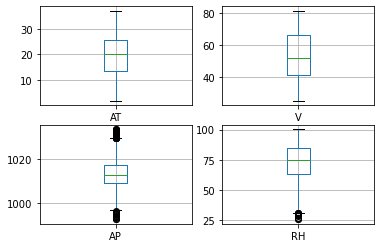

In [7]:
fig, axes = plt.subplots(2,2)
for i,el in enumerate(list(data.columns.values)[:-1]):
    a = data.boxplot(el, ax=axes.flatten()[i])

C:\Users\OLIVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


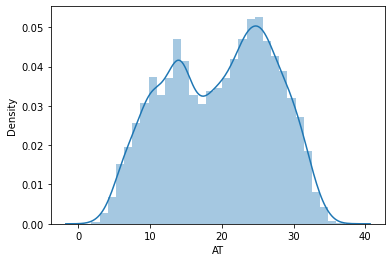

C:\Users\OLIVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


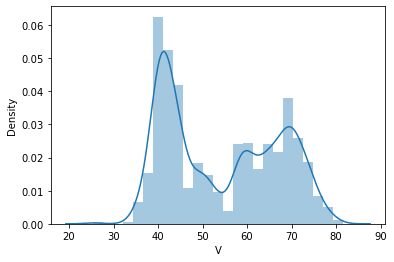

C:\Users\OLIVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


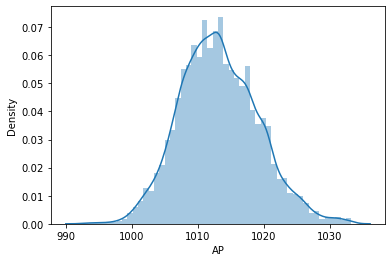

C:\Users\OLIVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


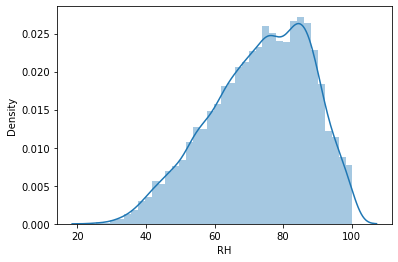

C:\Users\OLIVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


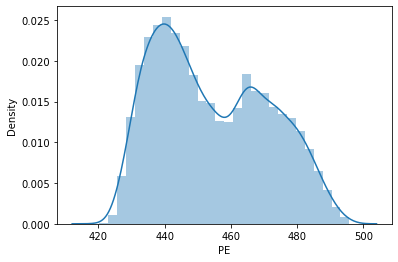

In [8]:
#checking for the distribution using violin plot:
for i in range(len(data.columns)):
    sns.distplot(data.iloc[:,i])
    plt.show()

          AT         V        AP        RH        PE
AT  1.000000  0.850620 -0.518790 -0.542706 -0.944412
V   0.850620  1.000000 -0.426129 -0.304938 -0.883702
AP -0.518790 -0.426129  1.000000  0.086776  0.542531
RH -0.542706 -0.304938  0.086776  1.000000  0.389640
PE -0.944412 -0.883702  0.542531  0.389640  1.000000
Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


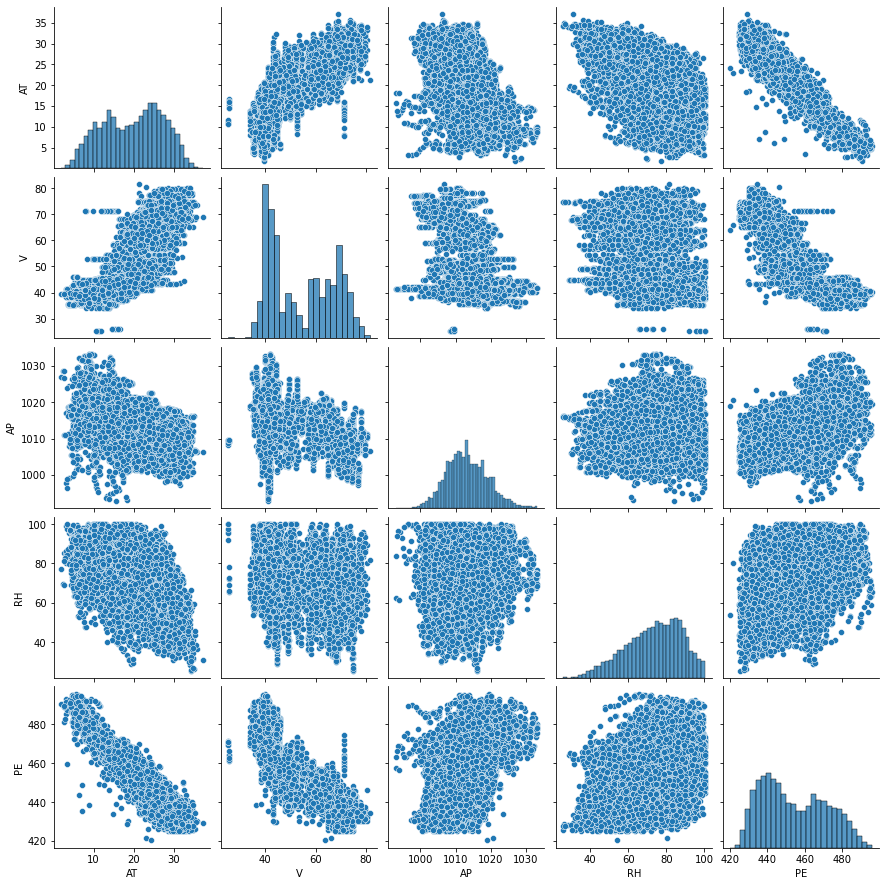

In [9]:
#checking linearity:
sns.pairplot(data)
print(data.corr(method="spearman"))

col=data.columns
print(col)

[[0.00742253 0.03628494 0.89963861 0.0801081  0.42762293]
 [0.02130587 0.05271491 0.91153798 0.06687376 0.40173824]
 [0.0270058  0.05166881 0.91455601 0.03805694 0.39842188]
 ...
 [0.01427882 0.03870195 0.90566503 0.07024217 0.41609513]
 [0.01576334 0.05347033 0.90970114 0.0845326  0.40272883]
 [0.0212985  0.04614074 0.91009693 0.06407537 0.40624541]]
             0         1         2         3         4
0     0.007423  0.036285  0.899639  0.080108  0.427623
1     0.021306  0.052715  0.911538  0.066874  0.401738
2     0.027006  0.051669  0.914556  0.038057  0.398422
3     0.017205  0.044831  0.908729  0.069281  0.408785
4     0.010506  0.036201  0.905596  0.086542  0.413503
...        ...       ...       ...       ...       ...
9563  0.013547  0.043831  0.906553  0.065344  0.414472
9564  0.030262  0.070605  0.915108  0.054093  0.392111
9565  0.014279  0.038702  0.905665  0.070242  0.416095
9566  0.015763  0.053470  0.909701  0.084533  0.402729
9567  0.021298  0.046141  0.910097  0.064

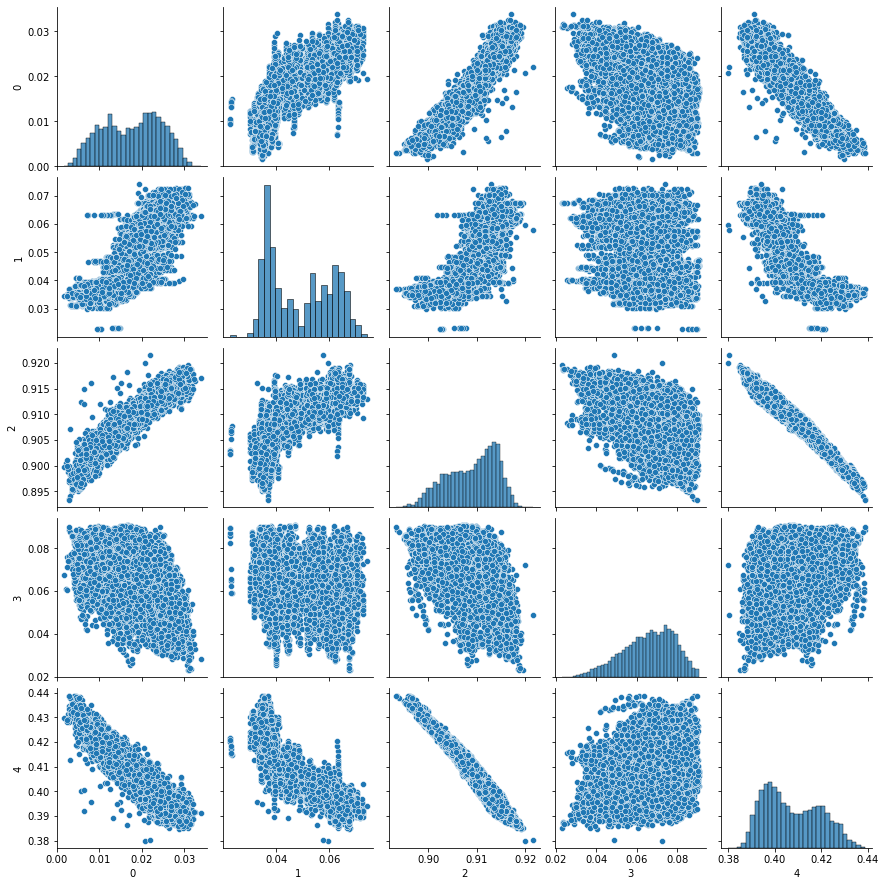

In [11]:
#normalizing the data:
df_nor=preprocessing.normalize(data)
print(df_nor)
df_nor=pd.DataFrame(df_nor)
print(df_nor)
sns.pairplot(df_nor)
df_nor.corr()
df_nor.columns = data.columns
df_nor.head()
x=df_nor.iloc[:,0:4]
y=df_nor.iloc[:,4]

In [12]:
#splitting train set:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


In [13]:
#fitting linear model:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
pred=lm.predict(X_train)
print(pred)
print(model.coef_)
print(model.intercept_)

[0.4199055  0.38976648 0.40802525 ... 0.39445388 0.39442472 0.41947694]
[-0.06076665 -0.14260372 -2.13874563 -0.14746826]
2.3694995824397096


In [14]:
#checking accuracy:
from sklearn.metrics import r2_score
print(r2_score(pred,y_train))
predd = lm.predict(X_test)
print(r2_score(predd,y_test))

0.9989856404800257
0.9990433118783909


Text(0.5, 1.0, 'Observed vs. Predicted Values')

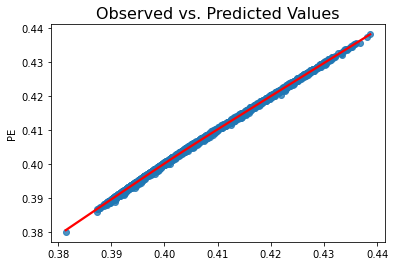

In [15]:
sns.regplot(x=predd, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)